# Simple Linear Regression Problem


Importing Essential Libraries
--

In the following step we import libraries required to solve the problem.
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Importing data
--
Using Pandas library to read the required dataset


In [93]:
data=pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Visualizing the Data
--

Text(0, 0.5, 'Scores(in %)')

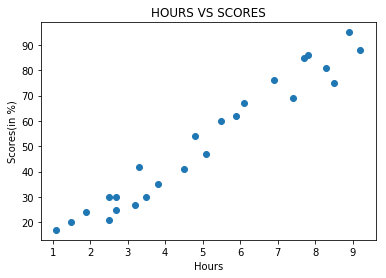

In [75]:
plt.scatter(x='Hours',y='Scores',data=data)
plt.title('HOURS VS SCORES')
plt.xlabel('Hours')
plt.ylabel('Scores(in %)')

In [76]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Splitting the dataset into Test and Train
--

In [77]:
model= LinearRegression()
x=data['Hours'].values.reshape(-1,1)
y=data['Scores'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Model Fitting using Training Data
--

In [78]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Slope and Intercept of Regression Line
--

In [79]:
print(model.intercept_)
print(model.coef_)

[2.01816004]
[[9.91065648]]


Model Prediction
--

In [80]:
y_pred=model.predict(x_test)

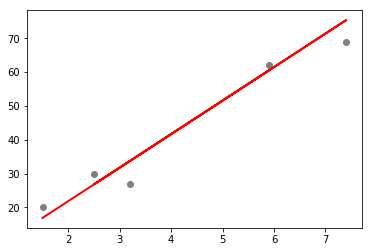

In [81]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [82]:
print(mean_absolute_error(y_pred,y_test))

4.183859899002975


In [83]:
value= data[0:0]
value['Hours']=[9.25]
predict=model.predict(value['Hours'].values.reshape(-1,1))
value['Scores']=predict

C:\Users\ubagh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ubagh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [84]:
value

,Hours,Scores
0,9.25,93.691732


Finally Testing the model on the whole dataset
--

In [85]:
y_pred2 =model.predict(x)

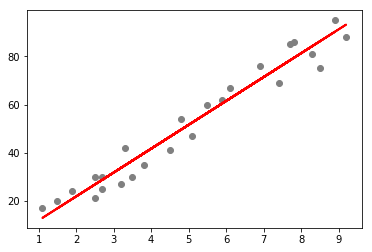

In [86]:
plt.scatter(x, y,  color='gray')
plt.plot(x, y_pred2, color='red', linewidth=2)
plt.show()

In [87]:
print(mean_absolute_error(y_pred2,y))

4.986053347144891


Model Evaluation
--

In [88]:
def DistributionPlot(RedFunction, BlueFunction, RedName=" ", BlueName=" ", Title=" "):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

C:\Users\ubagh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


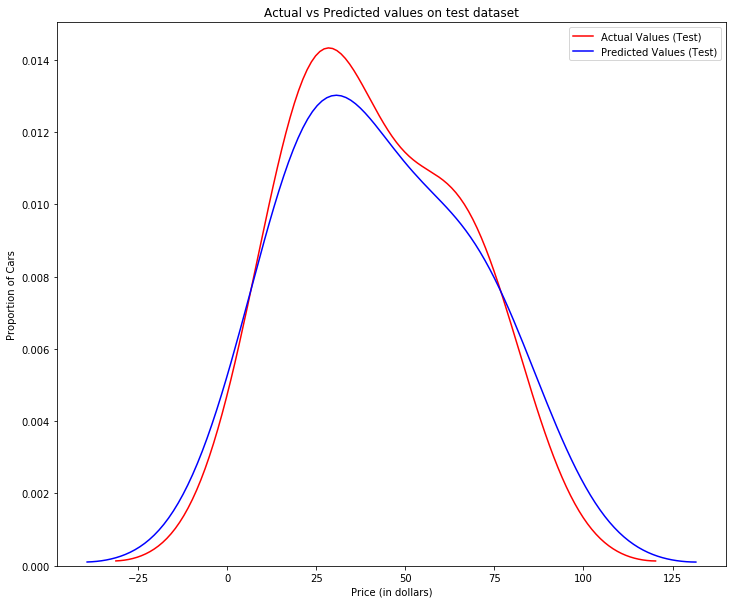

In [89]:
DistributionPlot(y_test, y_pred,"Actual Values (Test)", "Predicted Values (Test)","Actual vs Predicted values on test dataset")

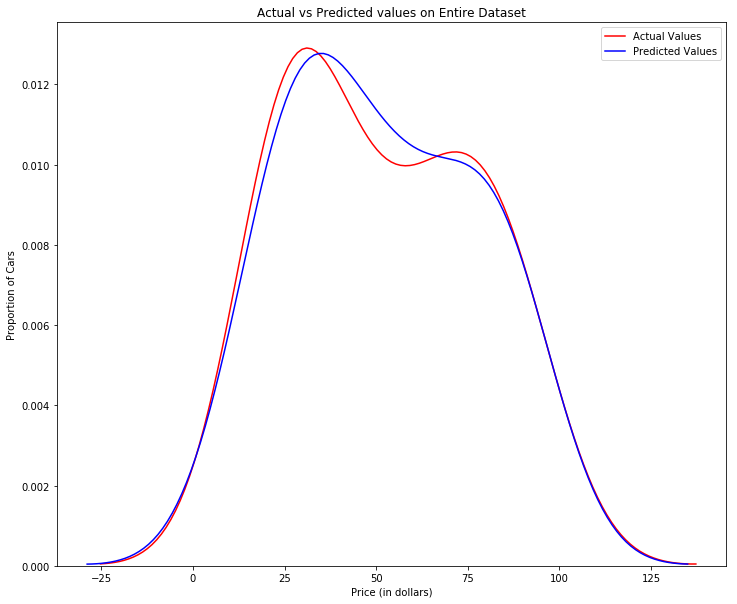

In [90]:
DistributionPlot(y, y_pred2,"Actual Values", "Predicted Values","Actual vs Predicted values on Entire Dataset")

In [91]:
print(model.score(x_test,y_test))
print(model.score(x,y))

0.9454906892105356
0.9526947647057274
